<a href="https://colab.research.google.com/github/Yewon-dev/boostcamp-AI-Tech/blob/master/TIL/%5BPython%5DMatplotlib_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text in Viz

- **Title** : 가장 큰 주제
- **Label** : 축에 해당하는 데이터 정보
- **Tick Label** : 축에 눈금을 사용한 스케일 정보
- **Legend** : 서로 다른 데이터를 분류하기 위한 정보
- **Annotation(Text)** : 그 외의 시각화에 대한 설명
  - https://matplotlib.org/stable/api/text_api.html#


### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

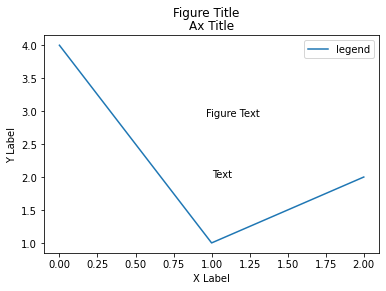

In [3]:
# Basic
fig, ax = plt.subplots()

fig.suptitle('Figure Title')

ax.plot([4, 1, 2], label='legend')
ax.legend()

ax.set_title('Ax Title')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

ax.text(x=1,y=2, s='Text')
fig.text(0.5, 0.6, s='Figure Text')

plt.show()

# Text Properties

## 1. Font
> [참고1](https://material.io/design/typography/understanding-typography.html)
>[참고2](https://ux.stackexchange.com/questions/52971/is-there-any-research-with-respect-to-how-font-weight-affects-readability)

- [Font Demo](https://matplotlib.org/stable/gallery/text_labels_and_annotations/fonts_demo.html) 보면서 `family`, `style`, `size`, `weight` 확인
![](https://matplotlib.org/stable/_images/sphx_glr_fonts_demo_001.png)

## 2. Details
- `color`
- `linespacing` : 줄간격
- `backgroundcolor`
- `alpha` : 투명도
- `zorder` : z축에서 순서
- `visible`


## 3. Alignment

- `ha` : horizontal alignment
- `va` : vertical alignment
- `rotation`
- `multialignment`




## 4. Advanced
- `bbox`
- [Drawing fancy boxes](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)

![image.png](https://matplotlib.org/stable/_images/sphx_glr_fancybox_demo_001.png)

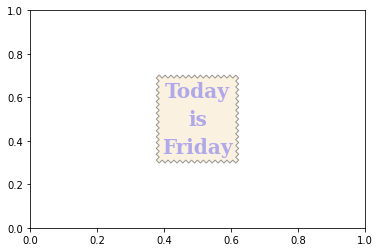

In [17]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Today\nis\nFriday',
        fontsize=20,
        fontweight='semibold',
        fontfamily='serif',
        color='blue',
        linespacing=1.5,
        backgroundcolor='lightblue',
        alpha=0.3,
        va = 'center', ## top, bottom, center
        ha = 'center', ## left, right, center
        rotation = 'horizontal', ## vertical, degree
        bbox = dict(boxstyle='sawtooth', facecolor='wheat', alpha=0.4)
       )

plt.show()

# Example w/ dataset

In [18]:
# dataset
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


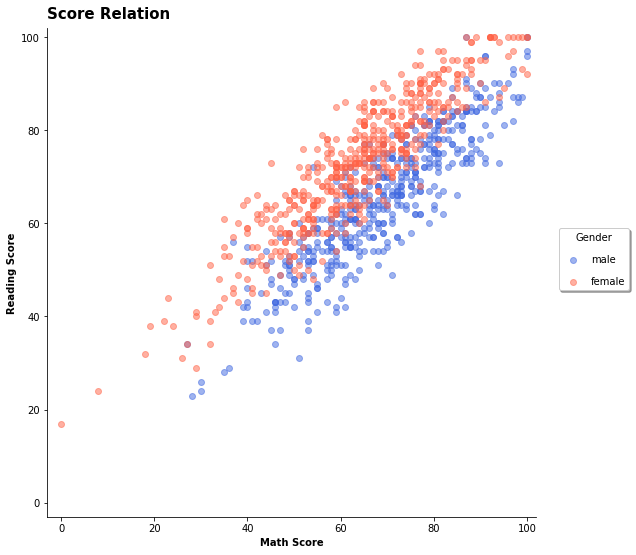

In [22]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)

## x,y축 점위    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', 
              fontweight='semibold')
ax.set_ylabel('Reading Score', 
              fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom',
             fontweight='bold', fontsize=15
            )
## 범례
ax.legend(
    title = 'Gender',
    shadow = True,
    labelspacing = 1.2,
    bbox_to_anchor = [1.2, 0.6]  ## 그래프 외부 좌표
#     loc='lower right'
#     ncol = 2, nrow = 2
)

plt.show()

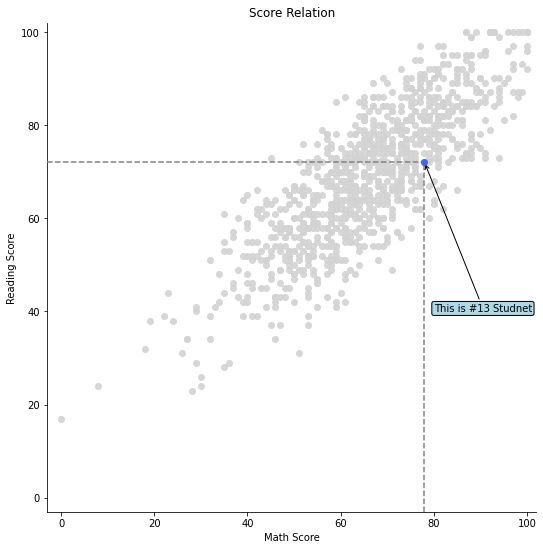

In [26]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='royalblue',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--',
       zorder=8)

bbox = dict(boxstyle="round", fc='lightblue', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

ax.annotate(s=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
           )

plt.show()